In [ ]:
#hypothesis: negative correlation of slippage and cost efficiency
#conclusion: 40% positive correlation between slippage and cost efficiency.
#calculated the the difference of cost proficiency to get the actual savings percentage.
#result: 40% + (moderate) negative correlation between slippage and cost efficiency.

                 Cost Efficiency  Cost  Slippage
Cost Efficiency              NaN   NaN       NaN
...                          ...   ...       ...
Slippage                     NaN   NaN       NaN

[3 rows x 3 columns]


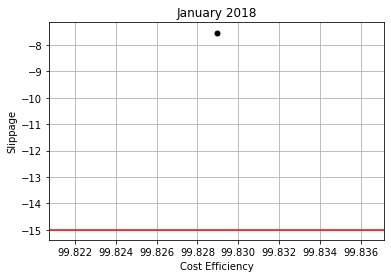

                 Cost Efficiency  Cost  Slippage
Cost Efficiency              NaN   NaN       NaN
...                          ...   ...       ...
Slippage                     NaN   NaN       NaN

[3 rows x 3 columns]


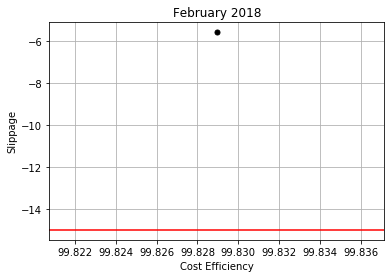

                 Cost Efficiency  Cost  Slippage
Cost Efficiency              1.0  -1.0      -1.0
Cost                        -1.0   1.0       1.0
Slippage                    -1.0   1.0       1.0


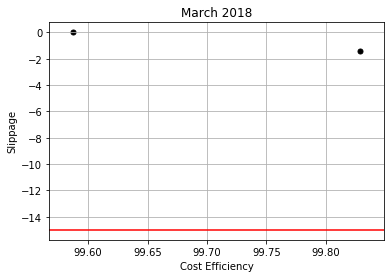

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.489220 -0.535149
Cost                    0.489220  1.000000  0.119277
Slippage               -0.535149  0.119277  1.000000


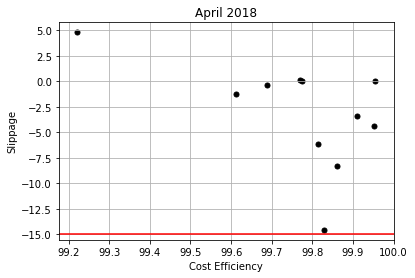

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.495401  0.053874
Cost                    0.495401  1.000000  0.213461
Slippage                0.053874  0.213461  1.000000


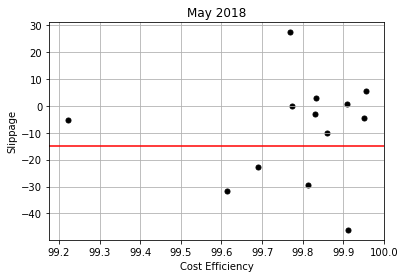

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.493991  0.447140
Cost                    0.493991  1.000000  0.187129
Slippage                0.447140  0.187129  1.000000


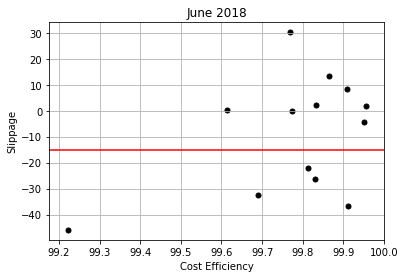

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.516519  0.217918
Cost                    0.516519  1.000000  0.394271
Slippage                0.217918  0.394271  1.000000


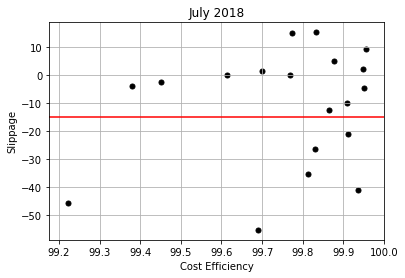

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.386613  0.564933
Cost                    0.386613  1.000000  0.360161
Slippage                0.564933  0.360161  1.000000


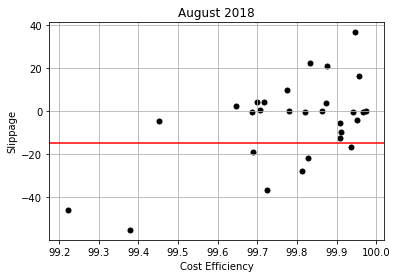

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.375166  0.190623
Cost                    0.375166  1.000000  0.275365
Slippage                0.190623  0.275365  1.000000


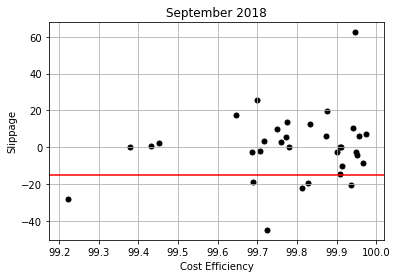

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.144234  0.022424
Cost                    0.144234  1.000000  0.503168
Slippage                0.022424  0.503168  1.000000


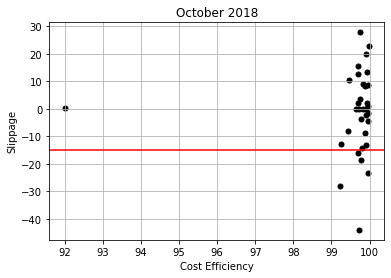

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.162549  0.054928
Cost                    0.162549  1.000000  0.628286
Slippage                0.054928  0.628286  1.000000


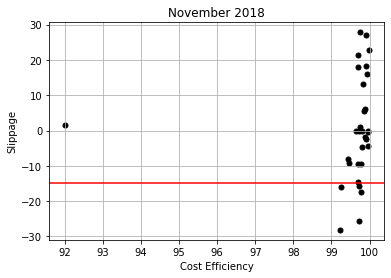

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.174284 -0.188007
Cost                    0.174284  1.000000  0.194029
Slippage               -0.188007  0.194029  1.000000


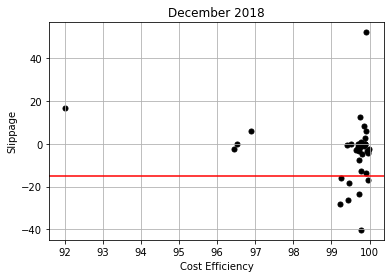

In [502]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for month in months:
    slip_df = pd.read_csv('datasets/slippage_2018/'+month+' 2018.csv',encoding='utf-8',skiprows=[i for i in range(0,8)], skipfooter=8, engine='python')
    slip_df = slip_df[pd.notnull(slip_df['Implementor'])]
    slip_df.replace(np.nan, -99999, inplace=True)
    slip_df.rename(columns={'Accomplishment':'% WT Actual',
                             'Unnamed: 5':'% WT Plan',
                           'Contract':'Cost',
                           'Implementor':'Contractor'}, inplace=True)
    slip_df['Cost'] = slip_df['Cost'].replace(',','',regex=True).astype(float)
    slip_df['Slippage'] = pd.Series([float(str(val).replace('%','')) for val in slip_df['Slippage']], index=slip_df.index)
    slip_df = slip_df.loc[slip_df['Slippage']!=slip_df['Slippage'].min()]
    slip_df['Date'] = pd.to_datetime(slip_df['Date'], errors='coerce')
    try:
        slip_df = slip_df[['Date','Contractor','Slippage','Cost','Target Date']].set_index('Date')
    except:
        slip_df = slip_df[['Date','Contractor','Slippage','Cost','Target Date of Completion']].set_index('Date')

    pd.set_option('display.max_rows', slip_df.shape[0]+1)

    civil_df = pd.read_csv('datasets/Procurement Monitoring Report (Civil Works) - 2018.csv')
    civil_df = civil_df[pd.notnull(civil_df['Contractor / Supplier'])]
    civil_df.replace(np.nan, -99999, inplace=True)
    civil_df.rename(columns={'Mode of Procurement':'Procurement Mode',
                             'Approved Budget of Contract (ABC)':'ABC',
                             'Contract Cost':'Cost',
                            'Contractor / Supplier':'Contractor'}, inplace=True)

    civil_df['Cost'] = civil_df['Cost'].replace(',','',regex=True).astype(float)
    civil_df['ABC'] = civil_df['ABC'].replace(',','',regex=True).astype(float)
    civil_df['Cost Efficiency'] = civil_df.apply(lambda row: ((row.Cost / row.ABC)*100), axis=1)
    civil_df = civil_df.loc[(civil_df['Cost Efficiency']!=civil_df['Cost Efficiency'].max())]
    civil_df = civil_df.loc[(civil_df['Cost Efficiency']!=civil_df['Cost Efficiency'].min())]
    #civil_df = civil_df.loc[(civil_df['Contractor']!='DUMALAG SURVEYING & ENGINEERINGSERVICES')]

    civil_df['PEO Compliance'] = pd.to_datetime(civil_df['PEO Compliance'], errors='coerce')
    civil_df = civil_df[['PEO Compliance','Contractor','Cost Efficiency','Cost']].set_index('PEO Compliance')

    pd.set_option('display.max_rows', civil_df.shape[0]+1)

    all_together = civil_df.merge(slip_df, on=['Cost'])
    pd.set_option('display.max_rows', all_together.shape[0]+1)
    all_together.dropna(inplace=True)
    print(all_together.corr())
    x = all_together['Cost Efficiency']
    y = all_together['Slippage']
    plt.scatter(x,y,label='skitscat',color='k',s=25,marker='o')
    plt.grid(True)
    plt.axhline(y=-15, color='r')
    plt.ylabel('Slippage')
    plt.xlabel('Cost Efficiency')
    plt.title(month+' 2018')
    plt.show()
    

In [503]:
all_together

,Contractor_x,Cost Efficiency,Cost,Contractor_y,Slippage,Target Date of Completion
0,FREDEN CONSTRUCTION,99.833166,2992000.00,FREDEN CONSTRUCTION,0.00,12/11/18
1,ILON MULTIBUILDERS CO.,99.431307,4066740.44,ILON MULTIBUILDERS CO.,-26.39,3/2/19
2,MARBEL DYNAMIC BUILDERS,99.813021,2989399.99,MARBEL DYNAMIC BUILDERS,0.00,8/18/18
3,ROCKSTONE CONSTRUCTION SERVICES & SUPPLY,99.689401,1962026.71,ROCKSTONE CONST. SERVICES & SUPPLY,0.00,8/30/18
4,ROCKSTONE CONSTRUCTION SERVICES & SUPPLY,99.221169,1488317.54,ROCKSTONE CONST. SERVICES & SUPPLY,-28.14,6/16/18
5,FREDEN CONSTRUCTION,99.950823,17240000.00,FREDEN CONSTRUCTION,-4.37,7/31/18
6,KING BUILDERS CONSTRUCTION & SUPPLY,99.723965,1263126.92,KING BUILDERS CONST. & SUPPLY,-7.51,10/27/18
7,THREE G BUILDERS,99.966934,7153222.57,THREE G BUILDERS,-16.87,1/24/19
8,FH GOPITEO CONSTRUCTION & SUPPLY,99.875766,10985324.48,FH GOPITEO CONST. & SUPPLY,0.00,12/15/18
9,PASE CONSTRUCTION,99.698959,9968842.72,PASE CONSTRUCTION,-2.80,1/3/19


                 Cost Efficiency  Cost  Slippage
Cost Efficiency              NaN   NaN       NaN
...                          ...   ...       ...
Slippage                     NaN   NaN       NaN

[3 rows x 3 columns]


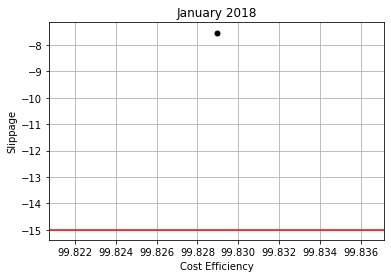

                 Cost Efficiency  Cost  Slippage
Cost Efficiency              NaN   NaN       NaN
...                          ...   ...       ...
Slippage                     NaN   NaN       NaN

[3 rows x 3 columns]


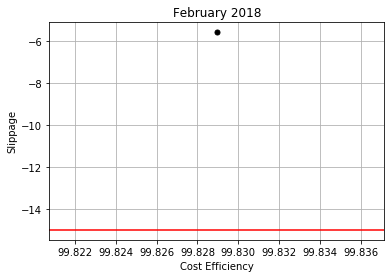

                 Cost Efficiency  Cost  Slippage
Cost Efficiency              1.0  -1.0      -1.0
Cost                        -1.0   1.0       1.0
Slippage                    -1.0   1.0       1.0


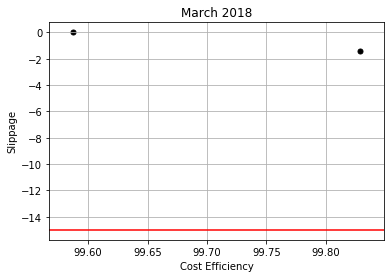

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.489220 -0.535149
Cost                    0.489220  1.000000  0.119277
Slippage               -0.535149  0.119277  1.000000


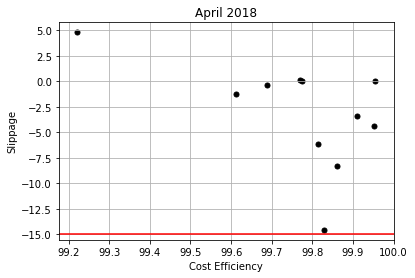

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.495401  0.053874
Cost                    0.495401  1.000000  0.213461
Slippage                0.053874  0.213461  1.000000


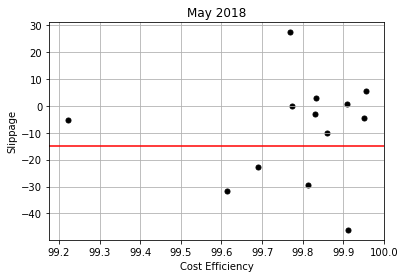

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.493991  0.447140
Cost                    0.493991  1.000000  0.187129
Slippage                0.447140  0.187129  1.000000


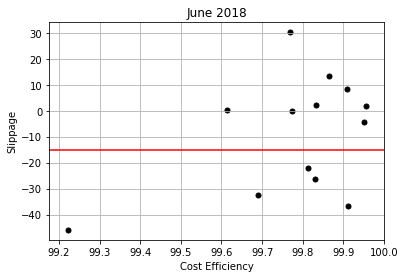

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.516519  0.217918
Cost                    0.516519  1.000000  0.394271
Slippage                0.217918  0.394271  1.000000


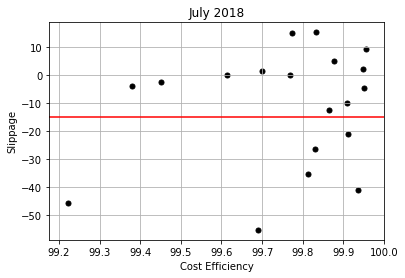

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.386613  0.564933
Cost                    0.386613  1.000000  0.360161
Slippage                0.564933  0.360161  1.000000


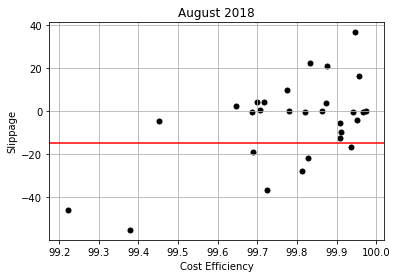

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.375166  0.190623
Cost                    0.375166  1.000000  0.275365
Slippage                0.190623  0.275365  1.000000


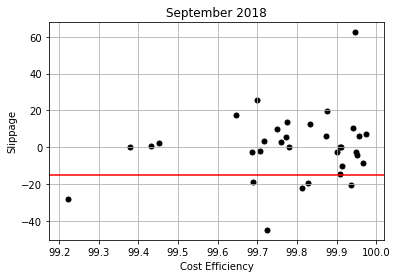

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.387251  0.274284
Cost                    0.387251  1.000000  0.506823
Slippage                0.274284  0.506823  1.000000


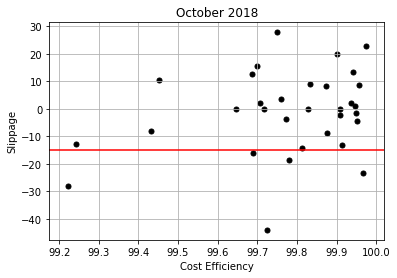

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.485603  0.523757
Cost                    0.485603  1.000000  0.632996
Slippage                0.523757  0.632996  1.000000


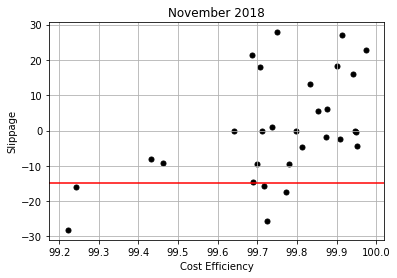

                 Cost Efficiency      Cost  Slippage
Cost Efficiency         1.000000  0.243183 -0.010476
Cost                    0.243183  1.000000  0.208400
Slippage               -0.010476  0.208400  1.000000


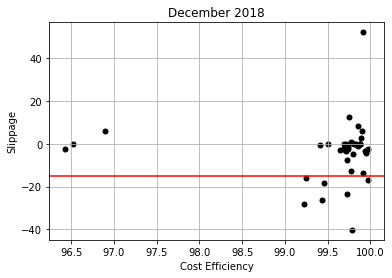

In [623]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for month in months:
    slip_df = pd.read_csv('datasets/slippage_2018/'+month+' 2018.csv',encoding='utf-8',skiprows=[i for i in range(0,8)], skipfooter=8, engine='python')
    slip_df = slip_df[pd.notnull(slip_df['Implementor'])]
    slip_df.replace(np.nan, -99999, inplace=True)
    slip_df.rename(columns={'Accomplishment':'% WT Actual',
                             'Unnamed: 5':'% WT Plan',
                           'Contract':'Cost',
                           'Implementor':'Contractor'}, inplace=True)
    slip_df['Cost'] = slip_df['Cost'].replace(',','',regex=True).astype(float)
    slip_df['Slippage'] = pd.Series([float(str(val).replace('%','')) for val in slip_df['Slippage']], index=slip_df.index)
    slip_df = slip_df.loc[slip_df['Slippage']!=slip_df['Slippage'].min()]
    slip_df['Date'] = pd.to_datetime(slip_df['Date'], errors='coerce')
    try:
        slip_df = slip_df[['Date','Contractor','Slippage','Cost','Target Date']].set_index('Date')
    except:
        slip_df = slip_df[['Date','Contractor','Slippage','Cost','Target Date of Completion']].set_index('Date')

    pd.set_option('display.max_rows', slip_df.shape[0]+1)

    civil_df = pd.read_csv('datasets/Procurement Monitoring Report (Civil Works) - 2018.csv')
    civil_df = civil_df[pd.notnull(civil_df['Contractor / Supplier'])]
    civil_df.replace(np.nan, -99999, inplace=True)
    civil_df.rename(columns={'Mode of Procurement':'Procurement Mode',
                             'Approved Budget of Contract (ABC)':'ABC',
                             'Contract Cost':'Cost',
                            'Contractor / Supplier':'Contractor'}, inplace=True)

    civil_df['Cost'] = civil_df['Cost'].replace(',','',regex=True).astype(float)
    civil_df['ABC'] = civil_df['ABC'].replace(',','',regex=True).astype(float)
    civil_df['Cost Efficiency'] = civil_df.apply(lambda row: ((row.Cost / row.ABC)*100), axis=1)
    civil_df = civil_df[(civil_df['Cost Efficiency']!=civil_df['Cost Efficiency'].max())]
    civil_df = civil_df[(civil_df['Contractor']!='DUMALAG SURVEYING & ENGINEERINGSERVICES')]
    

    civil_df['PEO Compliance'] = pd.to_datetime(civil_df['PEO Compliance'], errors='coerce')
    civil_df = civil_df[['PEO Compliance','Contractor','Cost Efficiency','Cost']].set_index('PEO Compliance')

    pd.set_option('display.max_rows', civil_df.shape[0]+1)

    all_together = civil_df.merge(slip_df, on=['Cost'])
    pd.set_option('display.max_rows', all_together.shape[0]+1)
    all_together.dropna(inplace=True)
    print(all_together.corr())

    x = all_together['Cost Efficiency']
    y = all_together['Slippage']
    
    plt.scatter(x,y,label='skitscat',color='k',s=25,marker='o')
    plt.grid(True)
    plt.ylabel('Slippage')
    plt.xlabel('Cost Efficiency')
    plt.axhline(y=-15, color='r')
    plt.title(month+' 2018')
    plt.show()
    
    


In [505]:
all_together

,Contractor_x,Cost Efficiency,Cost,Contractor_y,Slippage,Target Date of Completion
0,FREDEN CONSTRUCTION,99.833166,2992000.00,FREDEN CONSTRUCTION,0.00,12/11/18
1,ILON MULTIBUILDERS CO.,99.431307,4066740.44,ILON MULTIBUILDERS CO.,-26.39,3/2/19
2,MARBEL DYNAMIC BUILDERS,99.813021,2989399.99,MARBEL DYNAMIC BUILDERS,0.00,8/18/18
3,ROCKSTONE CONSTRUCTION SERVICES & SUPPLY,99.689401,1962026.71,ROCKSTONE CONST. SERVICES & SUPPLY,0.00,8/30/18
4,ROCKSTONE CONSTRUCTION SERVICES & SUPPLY,99.221169,1488317.54,ROCKSTONE CONST. SERVICES & SUPPLY,-28.14,6/16/18
5,FREDEN CONSTRUCTION,99.950823,17240000.00,FREDEN CONSTRUCTION,-4.37,7/31/18
6,KING BUILDERS CONSTRUCTION & SUPPLY,99.723965,1263126.92,KING BUILDERS CONST. & SUPPLY,-7.51,10/27/18
7,THREE G BUILDERS,99.966934,7153222.57,THREE G BUILDERS,-16.87,1/24/19
8,FH GOPITEO CONSTRUCTION & SUPPLY,99.875766,10985324.48,FH GOPITEO CONST. & SUPPLY,0.00,12/15/18
9,PASE CONSTRUCTION,99.698959,9968842.72,PASE CONSTRUCTION,-2.80,1/3/19


In [553]:
import pandas as pd
import numpy as np

slip_df = pd.read_csv('datasets/slippage_2018/June 2018.csv',encoding='utf-8',skiprows=[i for i in range(0,8)], skipfooter=8, engine='python')
slip_df = slip_df[pd.notnull(slip_df['Implementor'])]
slip_df.replace(np.nan, -99999, inplace=True)
slip_df.rename(columns={'Accomplishment':'% WT Actual',
                         'Unnamed: 5':'% WT Plan',
                       'Contract':'Cost',
                       'Implementor':'Contractor'}, inplace=True)
slip_df['Cost'] = slip_df['Cost'].replace(',','',regex=True).astype(float)
slip_df['Slippage'] = pd.Series([float(str(val).replace('%','')) for val in slip_df['Slippage']], index=slip_df.index)
#slip_df = slip_df.loc[(slip_df['Slippage']!=slip_df['Slippage'].min())]
#slip_df = slip_df[(slip_df['Remarks']=='Completed')]
slip_df = slip_df.loc[(slip_df['Contractor']=='FREDEN CONSTRUCTION')]

slip_df['Date'] = pd.to_datetime(slip_df['Date'], errors='coerce')
try:
    slip_df = slip_df[['Contractor','% WT Plan','% WT Actual','Slippage','Cost','No. of Days','Date','Target Date','Date Completed','Remarks']]
except:
    slip_df = slip_df[['Contractor','% WT Plan','% WT Actual','Slippage','Cost','No. of Days','Date','Target Date of Completion','Date Completed','Remarks']]

pd.set_option('display.max_rows', slip_df.shape[0]+1)

civil_df = pd.read_csv('datasets/Procurement Monitoring Report (Civil Works) - 2018.csv')
civil_df = civil_df[pd.notnull(civil_df['Contractor / Supplier'])]
civil_df.replace(np.nan, -99999, inplace=True)
civil_df.rename(columns={'Mode of Procurement':'Procurement Mode',
                         'Approved Budget of Contract (ABC)':'ABC',
                         'Contract Cost':'Cost',
                        'Contractor / Supplier':'Contractor'}, inplace=True)

civil_df['Cost'] = civil_df['Cost'].replace(',','',regex=True).astype(float)
civil_df['ABC'] = civil_df['ABC'].replace(',','',regex=True).astype(float)
civil_df['Cost Efficiency'] = civil_df.apply(lambda row: ((row.Cost / row.ABC)*100), axis=1)
civil_df = civil_df.loc[(civil_df['Cost Efficiency']!=civil_df['Cost Efficiency'].max())]
civil_df = civil_df.loc[(civil_df['Contractor']=='FREDEN CONSTRUCTION')&(civil_df['PR NO.']=='17-071')]


civil_df['PEO Compliance'] = pd.to_datetime(civil_df['PEO Compliance'], errors='coerce')
civil_df = civil_df[['PR NO.','PEO Compliance','Contractor','Cost Efficiency','Cost','ABC']]

pd.set_option('display.max_rows', civil_df.shape[0]+1)

all_together = civil_df.merge(slip_df, on=['Cost'])
pd.set_option('display.max_rows', all_together.shape[0]+1)
all_together.dropna(inplace=True)
all_together.set_index('PR NO.')
    

,PEO Compliance,Contractor_x,Cost Efficiency,Cost,ABC,Contractor_y,% WT Plan,% WT Actual,Slippage,No. of Days,Date,Target Date,Date Completed,Remarks
PR NO.,,,,,,,,,,,,,,
17-071,2018-03-23,FREDEN CONSTRUCTION,99.612903,1544000.0,1550000.0,FREDEN CONSTRUCTION,49.63%,49.74%,0.11,75.0,2018-03-29,7/16/18,-99999,On-going


In [617]:
import pandas as pd
import numpy as np

plan_join_df = pd.DataFrame()
actual_join_df = pd.DataFrame()
all_together = pd.DataFrame()
mos = ['0']
months = ['April','May','June']
for month in months:
    slip_df = pd.read_csv('datasets/slippage_2018/'+month+' 2018.csv',encoding='utf-8',skiprows=[i for i in range(0,8)], skipfooter=8, engine='python')
    slip_df = slip_df[pd.notnull(slip_df['Implementor'])]
    slip_df.replace(np.nan, -99999, inplace=True)
    slip_df.rename(columns={'Accomplishment':'% WT Actual',
                             'Unnamed: 5':'% WT Plan',
                           'Contract':'Cost',
                           'Implementor':'Contractor'}, inplace=True)
    slip_df['Cost'] = slip_df['Cost'].replace(',','',regex=True).astype(float)
    slip_df['Slippage'] = pd.Series([float(str(val).replace('%','')) for val in slip_df['Slippage']], index=slip_df.index)
    slip_df = slip_df.loc[slip_df['Slippage']!=slip_df['Slippage'].min()]
    slip_df['Date'] = pd.to_datetime(slip_df['Date'], errors='coerce')
    try:
        slip_df = slip_df[['Contractor','% WT Plan','% WT Actual','Slippage','Cost','No. of Days','Date','Target Date','Date Completed','Remarks']]
    except:
        slip_df = slip_df[['Contractor','% WT Plan','% WT Actual','Slippage','Cost','No. of Days','Date','Target Date of Completion','Date Completed','Remarks']]

    pd.set_option('display.max_rows', slip_df.shape[0]+1)

    civil_df = pd.read_csv('datasets/Procurement Monitoring Report (Civil Works) - 2018.csv')
    civil_df = civil_df[pd.notnull(civil_df['Contractor / Supplier'])]
    civil_df.replace(np.nan, -99999, inplace=True)
    civil_df.rename(columns={'Mode of Procurement':'Procurement Mode',
                             'Approved Budget of Contract (ABC)':'ABC',
                             'Contract Cost':'Cost',
                            'Contractor / Supplier':'Contractor'}, inplace=True)

    civil_df['Cost'] = civil_df['Cost'].replace(',','',regex=True).astype(float)
    civil_df['ABC'] = civil_df['ABC'].replace(',','',regex=True).astype(float)
    civil_df['Cost Efficiency'] = civil_df.apply(lambda row: ((row.Cost / row.ABC)*100), axis=1)
    civil_df = civil_df[(civil_df['Cost Efficiency']!=civil_df['Cost Efficiency'].max())]
    civil_df = civil_df.loc[(civil_df['Contractor']=='FREDEN CONSTRUCTION')&(civil_df['PR NO.']=='17-071')]
    

    civil_df['PEO Compliance'] = pd.to_datetime(civil_df['PEO Compliance'], errors='coerce')
    civil_df = civil_df[['PR NO.','PEO Compliance','Contractor','Cost Efficiency','Cost']].set_index('PEO Compliance')

    pd.set_option('display.max_rows', civil_df.shape[0]+1)

    all_together = civil_df.merge(slip_df, on=['Cost'])
    pd.set_option('display.max_rows', all_together.shape[0]+1)
    all_together.dropna(inplace=True)


    if actual_join_df.empty:
        actual_join_df = all_together[['PR NO.','% WT Actual']].set_index('PR NO.').rename(columns={'% WT Actual':month})
    else:
        actual_join_df = actual_join_df.merge(all_together[['PR NO.','% WT Actual']], on=['PR NO.']).set_index('PR NO.').rename(columns={'% WT Actual':month})
    actual_join_df[month] = pd.Series([float(str(val).replace('%','')) for val in actual_join_df[month]], index=actual_join_df.index)
    listToStr = ' '.join(map(str, actual_join_df[month].values))
    mos.append(listToStr)
    

In [618]:
mos


['0', '18.14', '38.55', '49.74']

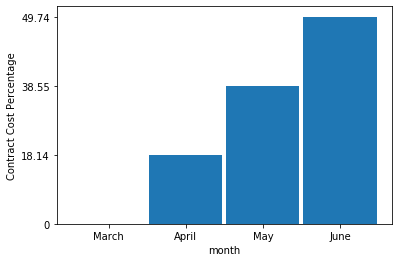

In [620]:
y = ['March','April','May','June']


plt.bar(y, mos,width=0.95 )
plt.xlabel('month')
plt.ylabel('Contract Cost Percentage')
#plt.legend()
plt.show()